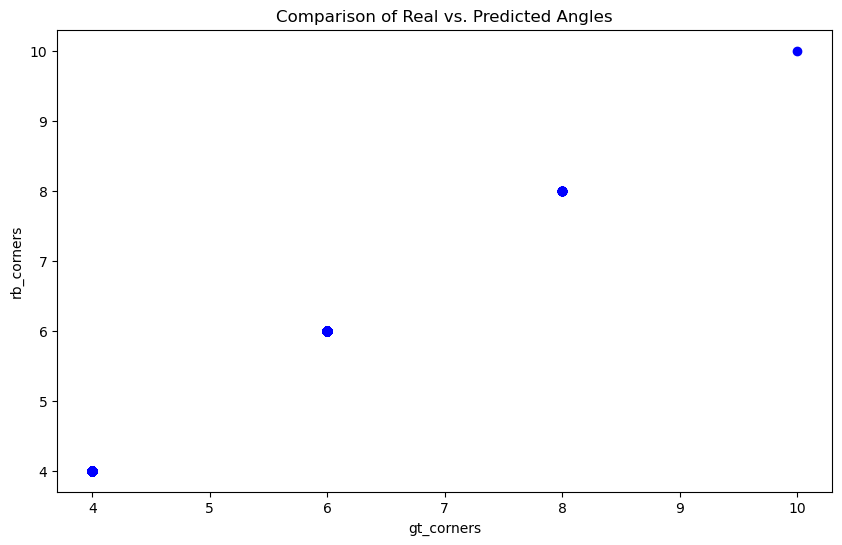

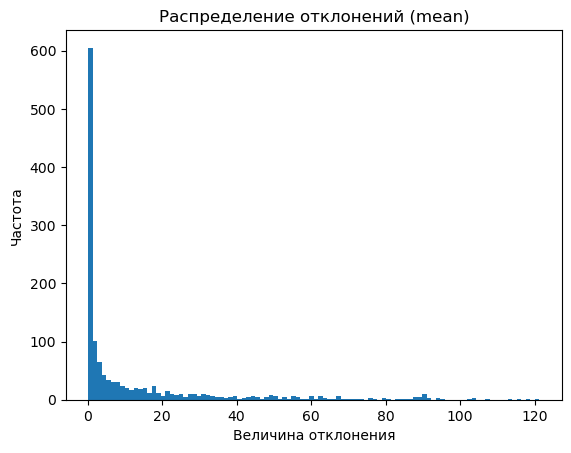

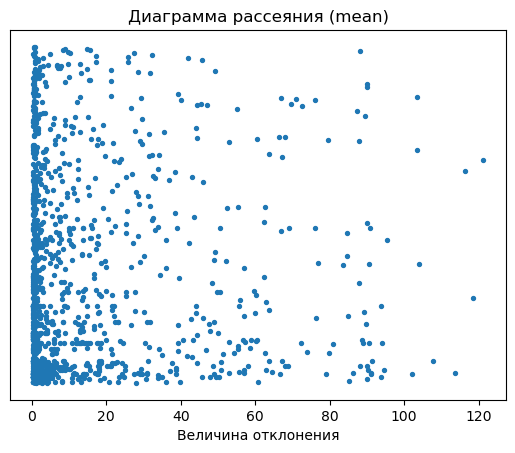

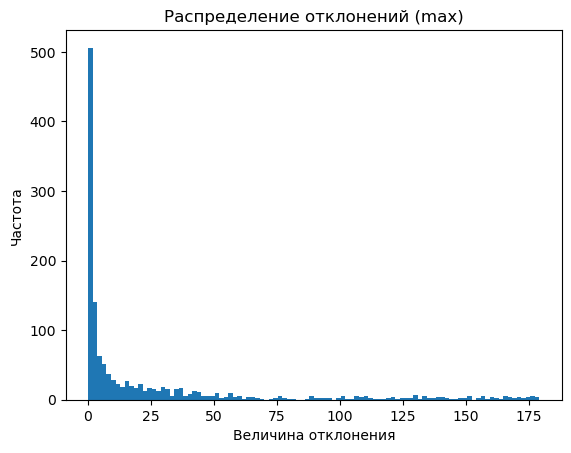

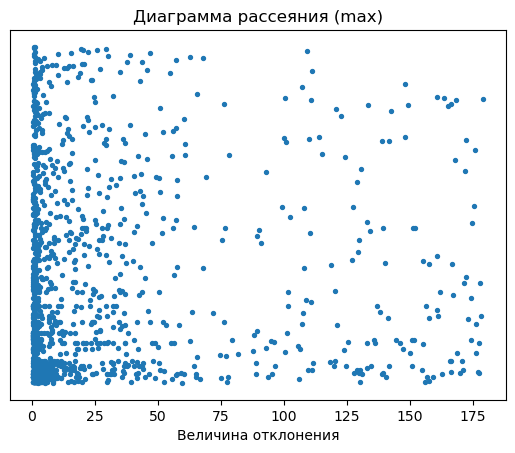

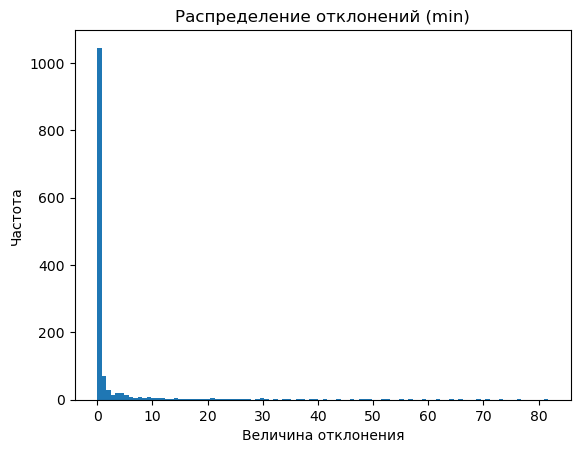

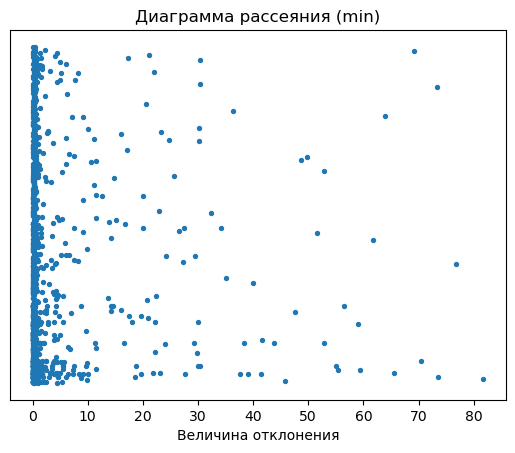

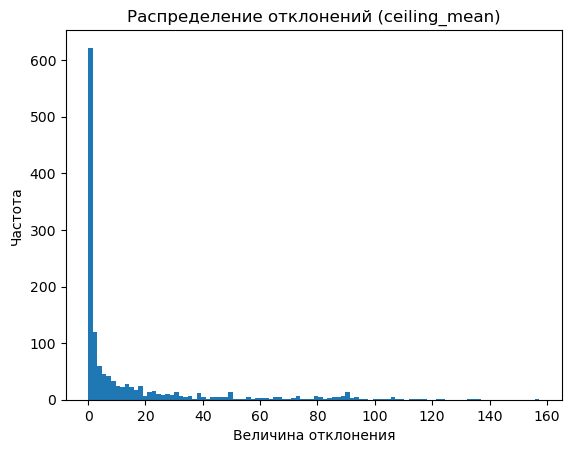

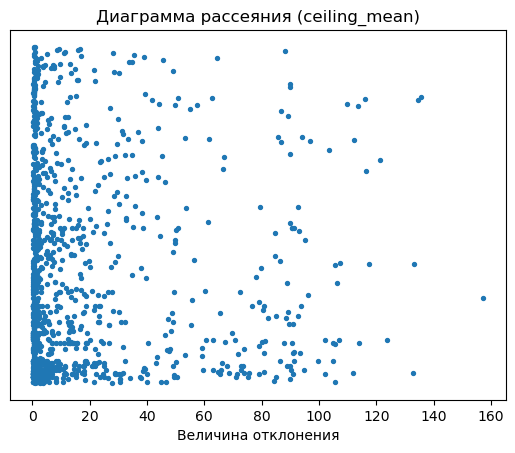

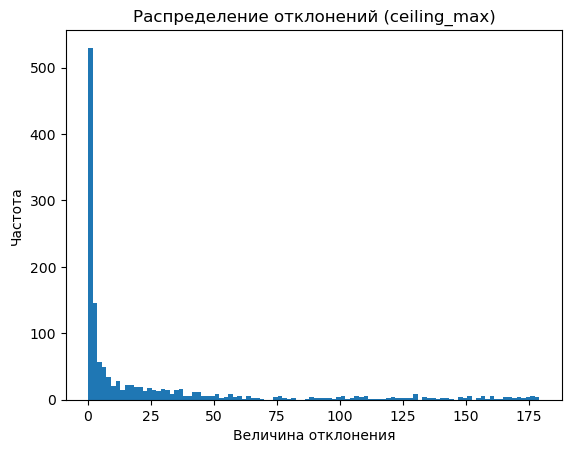

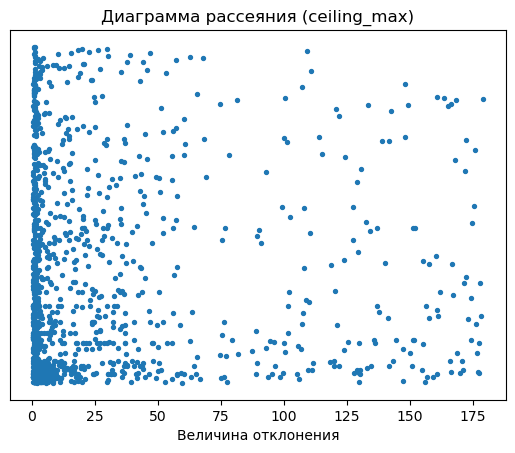

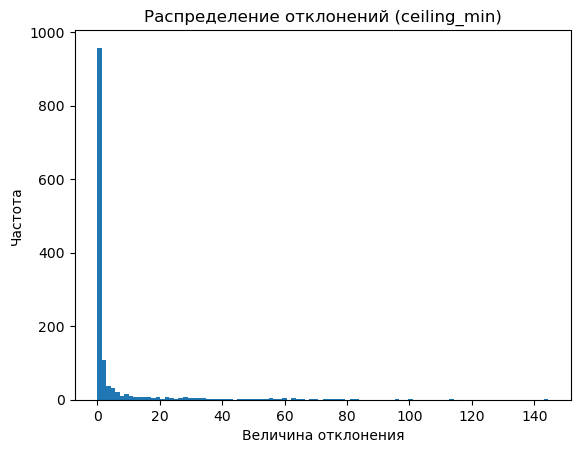

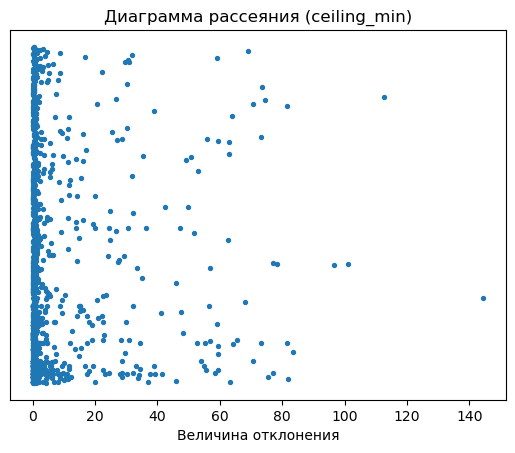

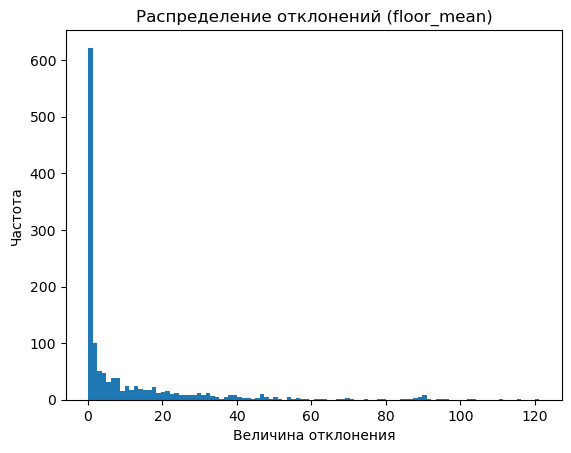

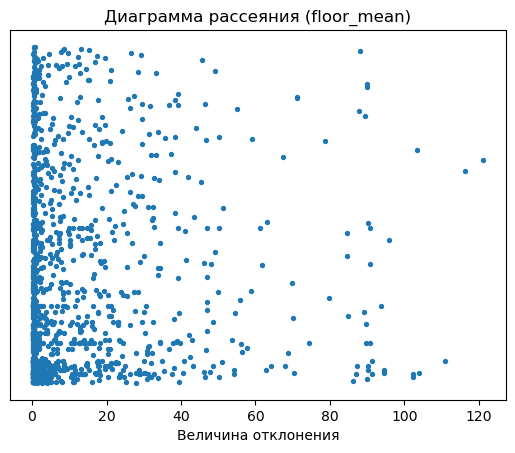

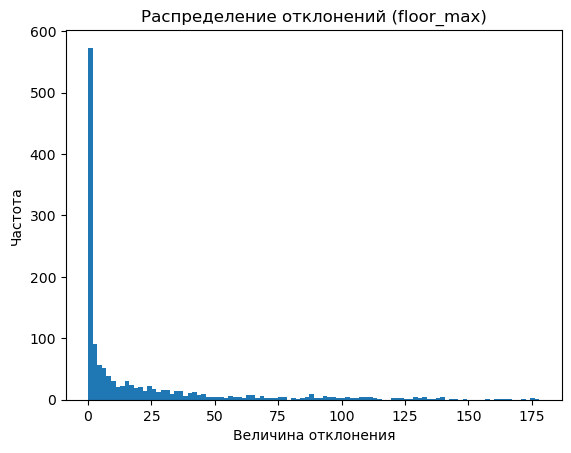

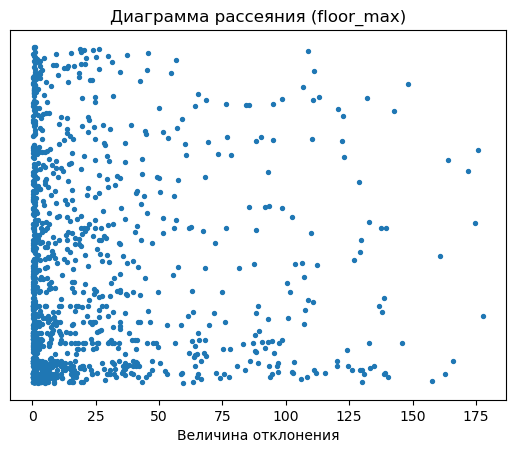

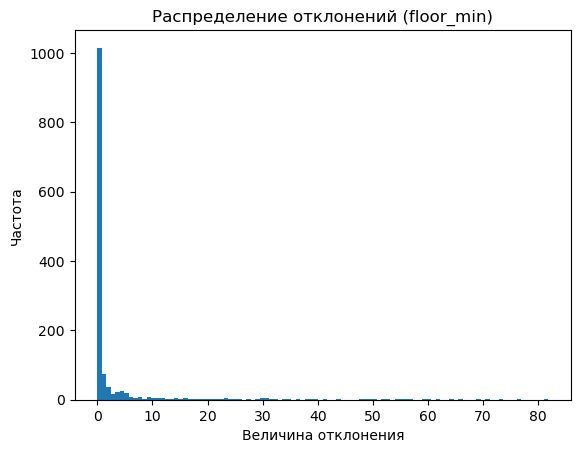

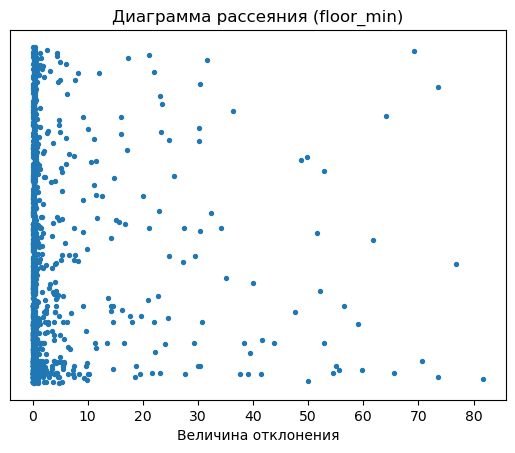

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


class PlotCreator:
    necessary_deviation_columns = ('mean', 'max', 'min',
                                   'ceiling_mean', 'ceiling_max', 'ceiling_min',
                                   'floor_mean', 'floor_max', 'floor_min')

    def draw_plots(self, json_file):
        # график точности модели при подсчёте количества комнат
        df = pd.read_json(json_file, orient='records')
        plt.figure(figsize=(10, 6))
        plt.scatter(df['gt_corners'], df['rb_corners'], color='b', label='Predicted vs. Real')
        plt.xlabel('gt_corners')
        plt.ylabel('rb_corners')
        plt.title('Comparison of Real vs. Predicted Angles')
        plt.show()
  

        for column in self.necessary_deviation_columns:
            # построение гистограмм для каждого столбца отклонения
            plt.hist(df[column], bins=100, linewidth=1)
            plt.xlabel('Величина отклонения')
            plt.ylabel('Частота')
            plt.title(f'Распределение отклонений ({column})')
            plt.show()


            # построение диаграмм рассеяния для каждого столбца отклонения
            plt.scatter(df[column], df['name'], s=8)
            plt.gca().get_yaxis().set_ticks([])
            plt.xlabel('Величина отклонения')
            plt.title(f'Диаграмма рассеяния ({column})')
            plt.show()


pc = PlotCreator()
pc.draw_plots('https://ai-process-sandy.s3.eu-west-1.amazonaws.com/purge/deviation.json')